<a href="https://colab.research.google.com/github/RukiyatDiekola/RukiyatDiekola/blob/main/WK4_PYTON_FORECAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  # this is to assign short codes to those codes to make it easier to use
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive #another way of mounting drive
drive.mount('drive')


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [3]:
#df is dataframe
df=pd.read_csv("/content/drive/MyDrive/New folder (2)/Food_Sale_Full_Data.csv") #go to drive, go to the file, copy its path and paste here
df

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,TotalPrice
0,1/1/2020,East,Boston,Bars,Carrot,33,1.77,58.41
1,1/4/2020,East,Boston,Crackers,Whole Wheat,87,3.49,303.63
2,1/7/2020,West,Los Angeles,Cookies,Chocolate Chip,58,1.87,108.46
3,1/10/2020,East,New York,Cookies,Chocolate Chip,82,1.87,153.34
4,1/13/2020,East,Boston,Cookies,Arrowroot,38,2.18,82.84
...,...,...,...,...,...,...,...,...
239,12/18/2021,East,Boston,Cookies,Arrowroot,34,2.18,74.12
240,12/21/2021,East,Boston,Cookies,Chocolate Chip,245,1.87,458.15
241,12/24/2021,East,Boston,Crackers,Whole Wheat,30,3.49,104.70
242,12/27/2021,West,Los Angeles,Bars,Bran,30,1.87,56.10


In [5]:
df.head(10) #put the number of rows you need to see in the parenthesis

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,TotalPrice
0,1/1/2020,East,Boston,Bars,Carrot,33,1.77,58.41
1,1/4/2020,East,Boston,Crackers,Whole Wheat,87,3.49,303.63
2,1/7/2020,West,Los Angeles,Cookies,Chocolate Chip,58,1.87,108.46
3,1/10/2020,East,New York,Cookies,Chocolate Chip,82,1.87,153.34
4,1/13/2020,East,Boston,Cookies,Arrowroot,38,2.18,82.84
5,1/16/2020,East,Boston,Bars,Carrot,54,1.77,95.58
6,1/19/2020,East,Boston,Crackers,Whole Wheat,149,3.49,520.01
7,1/22/2020,West,Los Angeles,Bars,Carrot,51,1.77,90.27
8,1/25/2020,East,New York,Bars,Carrot,100,1.77,177.00
9,1/28/2020,East,New York,Snacks,Potato Chips,28,1.35,37.80


In [8]:
df.tail(10)

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,TotalPrice
234,12/3/2021,West,Los Angeles,Bars,Bran,42,1.87,78.54
235,12/6/2021,West,Los Angeles,Cookies,Oatmeal Raisin,100,2.84,284.00
236,12/9/2021,East,New York,Bars,Carrot,38,1.77,67.26
237,12/12/2021,East,New York,Crackers,Whole Wheat,25,3.49,87.25
238,12/15/2021,West,San Diego,Cookies,Chocolate Chip,96,1.87,179.52
239,12/18/2021,East,Boston,Cookies,Arrowroot,34,2.18,74.12
240,12/21/2021,East,Boston,Cookies,Chocolate Chip,245,1.87,458.15
241,12/24/2021,East,Boston,Crackers,Whole Wheat,30,3.49,104.70
242,12/27/2021,West,Los Angeles,Bars,Bran,30,1.87,56.10
243,12/30/2021,West,Los Angeles,Cookies,Oatmeal Raisin,44,2.84,124.96


In [9]:
df.info() #to view information about the whole table, the return shows that those with non null are not in the correct data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderDate   244 non-null    object 
 1   Region      244 non-null    object 
 2   City        244 non-null    object 
 3   Category    244 non-null    object 
 4   Product     244 non-null    object 
 5   Quantity    244 non-null    int64  
 6   UnitPrice   244 non-null    float64
 7   TotalPrice  244 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 15.4+ KB


In [10]:
df.loc[0,"OrderDate"]

'1/1/2020'

In [11]:
df.loc[0,"OrderDate"].day_name() #this returns error because the day name has no attribute, the column needs to be converted to date format

AttributeError: ignored

In [13]:
#convert column into date format
df["OrderDate"]=pd.to_datetime(df["OrderDate"])

In [14]:
df.loc[0,"OrderDate"].day_name() #now works

'Wednesday'

In [15]:
df["OrderDate"]=pd.to_datetime(df["OrderDate"],format="%m/%d/%Y") #another way of converting the date format

In [16]:
#to view a column
df["OrderDate"]

0     2020-01-01
1     2020-01-04
2     2020-01-07
3     2020-01-10
4     2020-01-13
         ...    
239   2021-12-18
240   2021-12-21
241   2021-12-24
242   2021-12-27
243   2021-12-30
Name: OrderDate, Length: 244, dtype: datetime64[ns]

In [17]:
df["TotalPrice"].max() #to view maximum price

817.92

In [18]:
df["TotalPrice"].min() #min 

33.6

In [19]:
df.columns

Index(['OrderDate', 'Region', 'City', 'Category', 'Product', 'Quantity',
       'UnitPrice', 'TotalPrice'],
      dtype='object')

In [20]:
df[["OrderDate","City"]]

,OrderDate,City
0,2020-01-01,Boston
1,2020-01-04,Boston
2,2020-01-07,Los Angeles
3,2020-01-10,New York
4,2020-01-13,Boston
...,...,...
239,2021-12-18,Boston
240,2021-12-21,Boston
241,2021-12-24,Boston
242,2021-12-27,Los Angeles


In [23]:
df["City"].value_counts() #this retuns the category in column

Boston         88
New York       62
Los Angeles    55
San Diego      39
Name: City, dtype: int64

In [24]:
df[["OrderDate", "City"]] #to view multiple columns

,OrderDate,City
0,2020-01-01,Boston
1,2020-01-04,Boston
2,2020-01-07,Los Angeles
3,2020-01-10,New York
4,2020-01-13,Boston
...,...,...
239,2021-12-18,Boston
240,2021-12-21,Boston
241,2021-12-24,Boston
242,2021-12-27,Los Angeles


In [25]:
df.describe() #to view the statistical overview of the whole table

,Quantity,UnitPrice,TotalPrice
count,244.000000,244.000000,244.000000
mean,63.286885,2.200820,136.580246
std,47.112505,0.600169,108.354231
min,20.000000,1.350000,33.600000
25%,31.000000,1.770000,72.570000
50%,47.000000,1.870000,102.755000
75%,80.000000,2.840000,159.300000
max,306.000000,3.490000,817.920000


**BAR CHART**

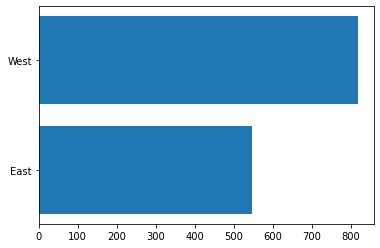

In [26]:
#matplotlib
plt.barh(df["Region"],df["TotalPrice"]) #plotting region and tt price
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


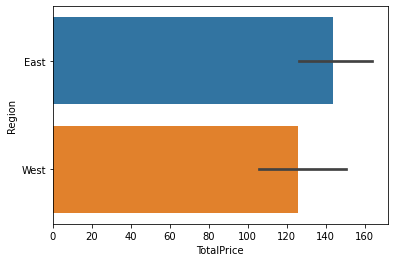

In [27]:
#seaborn
sns.barplot(df["TotalPrice"],df["Region"])
plt.show()

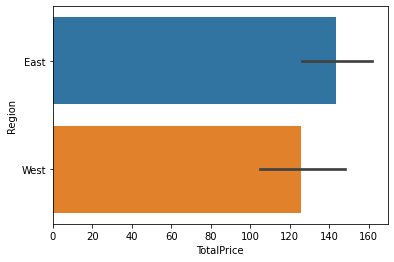

In [28]:
sns.barplot(x="TotalPrice", y="Region",data=df)
plt.show()

In [30]:
#Grouping totalprice according to regions
Region_price=df.groupby("Region")["TotalPrice"].sum().to_frame().reset_index()
Region_price

,Region,TotalPrice
0,East,21524.36
1,West,11801.22


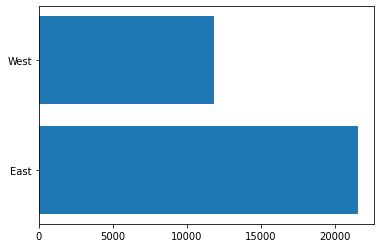

In [31]:
#Use grouped data to create a barchart
plt.barh(Region_price["Region"],Region_price["TotalPrice"]) 
plt.show()

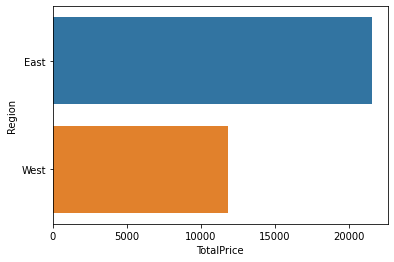

In [32]:
#grouped data to create a barchart using seaborn
sns.barplot(x="TotalPrice", y="Region",data=Region_price)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


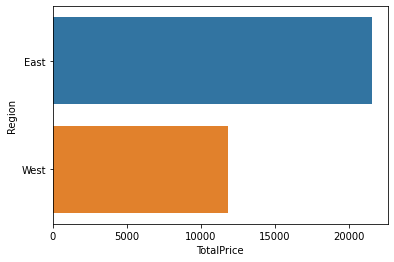

In [33]:
sns.barplot(Region_price["TotalPrice"],Region_price["Region"])
plt.show()

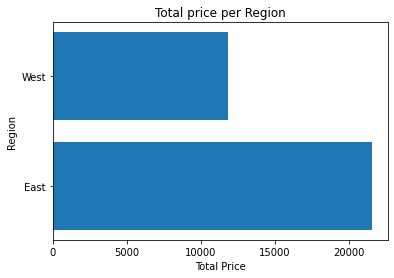

In [34]:
#Adding aesthetics
#matplotlib
plt.barh(Region_price["Region"],Region_price["TotalPrice"])
plt.title("Total price per Region")
plt.xlabel("Total Price")
plt.ylabel("Region")
plt.show()

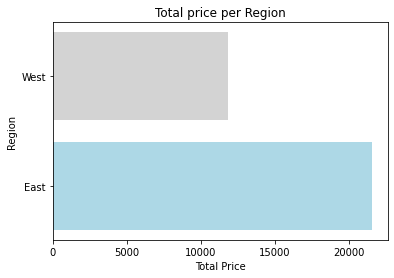

In [35]:
#Adding aesthetics
#matplotlib
#adding color
plt.barh(Region_price["Region"],Region_price["TotalPrice"],color=["lightblue","lightgrey"])
plt.title("Total price per Region")
plt.xlabel("Total Price")
plt.ylabel("Region")
plt.show()


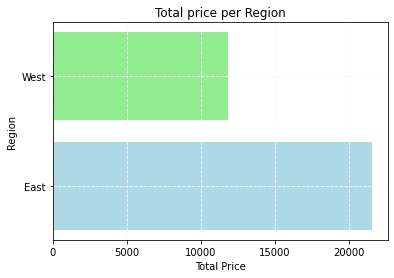

In [38]:
#Adding aesthetics
#matplotlib
plt.barh(Region_price["Region"],Region_price["TotalPrice"],color=["lightblue","lightgreen"])
plt.title("Total price per Region")
plt.xlabel("Total Price")
plt.ylabel("Region")
plt.grid(color="whitesmoke",linestyle="--", linewidth=0.9)
plt.show()



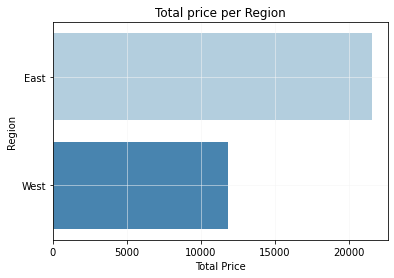

In [39]:
#seaborn
sns.barplot(x="TotalPrice", y="Region", data=Region_price,palette="Blues")
plt.title("Total price per Region")
plt.xlabel("Total Price")
plt.ylabel("Region")
plt.grid(color="whitesmoke",linestyle="-", linewidth=0.5)
plt.show()


**STACKED COLUMN CHARTS**

In [41]:
df["Category"].value_counts()

Cookies     95
Bars        94
Snacks      29
Crackers    26
Name: Category, dtype: int64

In [43]:
#Creating pivot tables
df_pivot=pd.pivot_table(df,values ="TotalPrice", index="Category",columns="City",aggfunc=np.mean)
df_pivot


City,Boston,Los Angeles,New York,San Diego
Category,,,,
Bars,114.482414,120.265417,116.738846,86.266667
Cookies,202.546875,183.842273,191.000000,130.756842
Crackers,149.043529,73.290000,98.418000,83.760000
Snacks,93.030000,87.120000,58.836667,56.000000


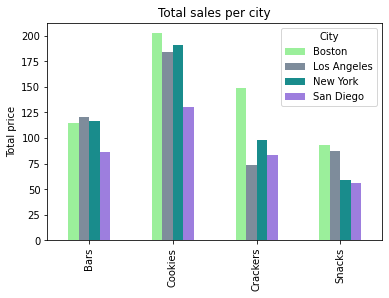

In [51]:
#matplotlib
#rouped column chart
ax=df_pivot.plot(kind="bar", alpha=0.9, color=["lightgreen","slategrey","teal","mediumpurple"])
plt.title("Total sales per city")
plt.xlabel(None)
plt.ylabel("Total price")
plt.show()

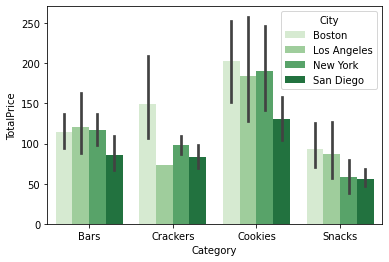

In [50]:
#seaborn automatically does the title and all but matplotlab requires editing but an advantage of matplotlib is that it allows one to edit to preference
#seaborn #stacked
sns.barplot(x="Category", y="TotalPrice", hue="City", data=df,palette="Greens")

**PIE CHARTS**

In [53]:
#Grouping data
City_price=df.groupby("City")["TotalPrice"].sum().to_frame().reset_index()
City_price

,City,TotalPrice
0,Boston,13265.53
1,Los Angeles,7687.32
2,New York,8258.83
3,San Diego,4113.90


In [54]:
#defining variables
City_price=df.groupby("City")["TotalPrice"].sum().to_frame().reset_index()
price_data=City_price["TotalPrice"]
city_data=City_price["City"]

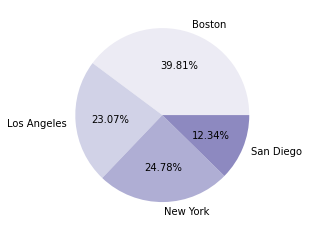

In [58]:
palette_colour=sns.color_palette("Purples")
plt.pie(price_data, labels =city_data,colors=palette_colour,autopct="%0.2f%%")
plt.show()


**BOX PLOT**

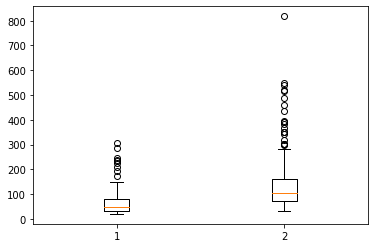

20

In [60]:
columns=[df["Quantity"], df["TotalPrice"]]
plt.boxplot(columns)
plt.show()
#checking
df["TotalPrice"].max()
df["Quantity"].max()
df["TotalPrice"].min()
df["Quantity"].min()

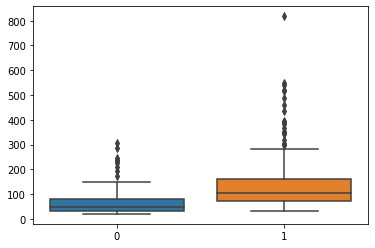

In [61]:
#seaborn
sns.boxplot(data=[df["Quantity"],df["TotalPrice"]],orient="v")

**LINE CHART**

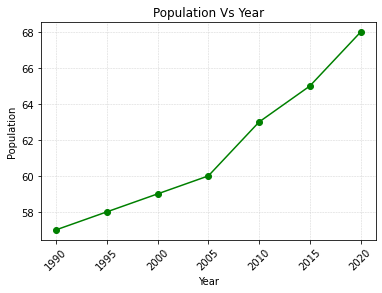

In [66]:
Data = {'Year':[1990,1995,2000,2005,2010,2015,2020],
        "Population": [57,58,59,60,63,65,68]
        }
df1=pd.DataFrame(Data,columns=["Year","Population"]) #creating data frames
plt.plot(df1["Year"],df1["Population"], color="green", marker="o")
plt.title("Population Vs Year")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(color="lightgrey", linestyle="--",linewidth=0.5)
plt.xticks(rotation=45)
plt.show()


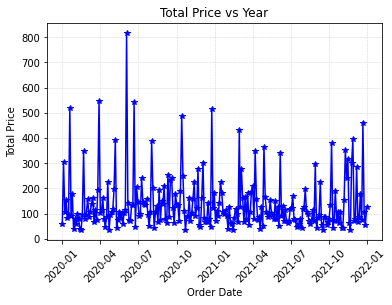

In [67]:
df_date=df.groupby("OrderDate")["TotalPrice"].sum().to_frame().reset_index()
df_date
plt.plot(df_date["OrderDate"],df_date["TotalPrice"], color="blue", marker="*")
plt.title("Total Price vs Year")
plt.xlabel("Order Date")
plt.ylabel("Total Price")
plt.grid(color="lightgrey", linestyle="--",linewidth=0.5)
plt.xticks(rotation=45)
plt.show()


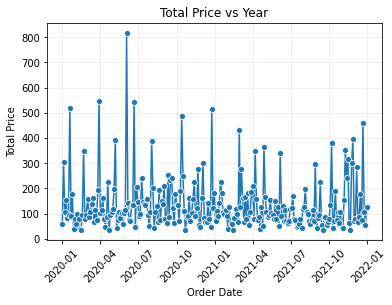

In [68]:
#seaborn
df_date=df.groupby("OrderDate")["TotalPrice"].sum().to_frame().reset_index()
df_date
sns.lineplot(data=df_date,x="OrderDate",y="TotalPrice", marker="o")
plt.title("Total Price vs Year")
plt.xlabel("Order Date")
plt.ylabel("Total Price")
plt.grid(color="lightgrey", linestyle="--",linewidth=0.5)
plt.xticks(rotation=45)
plt.show()


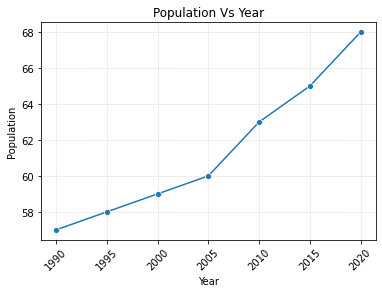

In [69]:
#seaborn
Data = {'Year': [1990,1995,2000,2005,2010,2015,2020],
        'Population': [57,58,59,60,63,65,68]
       }
df1=pd.DataFrame(Data,columns=["Year","Population"])#creating data frame
sns.lineplot(data=df1,x="Year",y="Population", marker="o")
plt.title("Population Vs Year")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(color="lightgrey", linestyle="--",linewidth=0.5)
plt.xticks(rotation=45)
plt.show()


**DATA FRAMES**

In [70]:
date =pd.to_datetime("4th of july,2015")
date

Timestamp('2015-07-04 00:00:00')

In [71]:
date =pd.to_datetime("07/04/2015")
date

Timestamp('2015-07-04 00:00:00')

In [72]:
#"%A"-day
date.strftime("%A")


'Saturday'

In [73]:
#"%B"-month
date.strftime("%B")


'July'

In [74]:
date + pd.to_timedelta(np.arange(12), 'D')


DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [75]:
import datetime
datetime.datetime.now()

datetime.datetime(2022, 11, 16, 13, 35, 49, 444754)

In [77]:
#Using now() function in datetime, can you print the day and year from the date?
#Using the current time and date, print the next 10 minutes
#The figure below is an example showing the next 10 minutes from the current time

x=datetime.datetime.now()
x + pd.to_timedelta(np.arange(10),"Minute")

DatetimeIndex(['2022-11-16 13:39:53.907571', '2022-11-16 13:40:53.907571',
               '2022-11-16 13:41:53.907571', '2022-11-16 13:42:53.907571',
               '2022-11-16 13:43:53.907571', '2022-11-16 13:44:53.907571',
               '2022-11-16 13:45:53.907571', '2022-11-16 13:46:53.907571',
               '2022-11-16 13:47:53.907571', '2022-11-16 13:48:53.907571'],
              dtype='datetime64[ns]', freq=None)

In [78]:
index=pd.DatetimeIndex(["2022-10-13","2022-11-13","2023-10-13","2023-11-13"])
data=pd.Series([0,1,2,3],index =index)
data


2022-10-13    0
2022-11-13    1
2023-10-13    2
2023-11-13    3
dtype: int64

In [79]:
data["2022-10-13":"2022-11-13"]

2022-10-13    0
2022-11-13    1
dtype: int64

In [80]:
#Refgular sequence
pd.date_range('2015-07-03', '2015-07-10',freq="H")


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00',
               '2015-07-03 08:00:00', '2015-07-03 09:00:00',
               ...
               '2015-07-09 15:00:00', '2015-07-09 16:00:00',
               '2015-07-09 17:00:00', '2015-07-09 18:00:00',
               '2015-07-09 19:00:00', '2015-07-09 20:00:00',
               '2015-07-09 21:00:00', '2015-07-09 22:00:00',
               '2015-07-09 23:00:00', '2015-07-10 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [81]:
#Refgular sequence
pd.date_range('2015-07-03', '2015-07-10',freq="D")


DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [82]:
pd.date_range('2015-07-03', periods=8)


DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

**DATA CLEANSING**

In [90]:
df3=pd.read_csv("/content/drive/MyDrive/New folder (2)/Food samples.csv")
df3


,id,OrderDate,Region,City,Category,Product,Quantity,UnitPrice
0,1,1/1/2020,East,Boston,Bars,Carrot,33.0,1.77
1,2,1/4/2020,East,Boston,Crackers,Whole Wheat,87.0,3.49
2,3,1/7/2020,West,Los Angeles,Cookies,Chocolate Chip,58.0,1.87
3,4,1/10/2020,East,New York,Cookies,Chocolate Chip,82.0,1.87
4,5,NaN,East,NaN,NaN,NaN,NaN,NaN
5,6,1/16/2020,East,Boston,Bars,Carrot,54.0,1.77
6,7,1/19/2020,East,Boston,Crackers,Whole Wheat,149.0,3.49
7,8,1/22/2020,West,Los Angeles,Bars,Carrot,51.0,1.77


In [91]:
#checking for missing values
df3.isnull().sum()

id           0
OrderDate    1
Region       0
City         1
Category     1
Product      1
Quantity     1
UnitPrice    1
dtype: int64

In [92]:
df3.loc[df3.isnull().any(axis =1)]


,id,OrderDate,Region,City,Category,Product,Quantity,UnitPrice
4,5,NaN,East,NaN,NaN,NaN,NaN,NaN


In [93]:
#drop NaN
#Reset index after drop
df3 = df3.dropna().reset_index(drop = True)
df3



,id,OrderDate,Region,City,Category,Product,Quantity,UnitPrice
0,1,1/1/2020,East,Boston,Bars,Carrot,33.0,1.77
1,2,1/4/2020,East,Boston,Crackers,Whole Wheat,87.0,3.49
2,3,1/7/2020,West,Los Angeles,Cookies,Chocolate Chip,58.0,1.87
3,4,1/10/2020,East,New York,Cookies,Chocolate Chip,82.0,1.87
4,6,1/16/2020,East,Boston,Bars,Carrot,54.0,1.77
5,7,1/19/2020,East,Boston,Crackers,Whole Wheat,149.0,3.49
6,8,1/22/2020,West,Los Angeles,Bars,Carrot,51.0,1.77


In [ ]:
#to drop a column permanent
df3.drop(["id"],axis=1,inplace=True)
df3


In [94]:
#to create a column
df3['Total Price'] = df3['Quantity']*df3['UnitPrice']
df3


,id,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,Total Price
0,1,1/1/2020,East,Boston,Bars,Carrot,33.0,1.77,58.41
1,2,1/4/2020,East,Boston,Crackers,Whole Wheat,87.0,3.49,303.63
2,3,1/7/2020,West,Los Angeles,Cookies,Chocolate Chip,58.0,1.87,108.46
3,4,1/10/2020,East,New York,Cookies,Chocolate Chip,82.0,1.87,153.34
4,6,1/16/2020,East,Boston,Bars,Carrot,54.0,1.77,95.58
5,7,1/19/2020,East,Boston,Crackers,Whole Wheat,149.0,3.49,520.01
6,8,1/22/2020,West,Los Angeles,Bars,Carrot,51.0,1.77,90.27


In [95]:
df3.City.unique()

array(['Boston', 'Los Angeles', 'New York'], dtype=object)

In [96]:
df3.City.unique().tolist()

['Boston', 'Los Angeles', 'New York']

In [97]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7 non-null      int64  
 1   OrderDate    7 non-null      object 
 2   Region       7 non-null      object 
 3   City         7 non-null      object 
 4   Category     7 non-null      object 
 5   Product      7 non-null      object 
 6   Quantity     7 non-null      float64
 7   UnitPrice    7 non-null      float64
 8   Total Price  7 non-null      float64
dtypes: float64(3), int64(1), object(5)
memory usage: 632.0+ bytes


In [98]:
df3.groupby("City")["Total Price"].sum()


City
Boston         977.63
Los Angeles    198.73
New York       153.34
Name: Total Price, dtype: float64

In [99]:
#SORT
sorted_df3=df3.sort_values(by=["Total Price"], ascending=False)
sorted_df3


,id,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,Total Price
5,7,1/19/2020,East,Boston,Crackers,Whole Wheat,149.0,3.49,520.01
1,2,1/4/2020,East,Boston,Crackers,Whole Wheat,87.0,3.49,303.63
3,4,1/10/2020,East,New York,Cookies,Chocolate Chip,82.0,1.87,153.34
2,3,1/7/2020,West,Los Angeles,Cookies,Chocolate Chip,58.0,1.87,108.46
4,6,1/16/2020,East,Boston,Bars,Carrot,54.0,1.77,95.58
6,8,1/22/2020,West,Los Angeles,Bars,Carrot,51.0,1.77,90.27
0,1,1/1/2020,East,Boston,Bars,Carrot,33.0,1.77,58.41


In [101]:
sorted_df3=df3.sort_values(by=["Total Price"], ascending=True)
sorted_df3

,id,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,Total Price
0,1,1/1/2020,East,Boston,Bars,Carrot,33.0,1.77,58.41
6,8,1/22/2020,West,Los Angeles,Bars,Carrot,51.0,1.77,90.27
4,6,1/16/2020,East,Boston,Bars,Carrot,54.0,1.77,95.58
2,3,1/7/2020,West,Los Angeles,Cookies,Chocolate Chip,58.0,1.87,108.46
3,4,1/10/2020,East,New York,Cookies,Chocolate Chip,82.0,1.87,153.34
1,2,1/4/2020,East,Boston,Crackers,Whole Wheat,87.0,3.49,303.63
5,7,1/19/2020,East,Boston,Crackers,Whole Wheat,149.0,3.49,520.01


In [105]:
#To create a new table
raw_data = {'ID': [1, 2, 3, 4, 5],
            'Name': ['Sara', 'Katie', 'David', 'Hazal', 'Georgie'],
            'Address': [42, 38, 36, 41, 35],
            'Salary': [33000, 45000, 65000, 95000, 35000]}
rank=pd.DataFrame(raw_data,columns=["ID","Name","Address","Salary"])
print(rank)

   ID     Name  Address  Salary
0   1     Sara       42     5.0
1   2    Katie       38     3.0
2   3    David       36     2.0
3   4    Hazal       41     1.0
4   5  Georgie       35     4.0


In [106]:
#to rank
rank["Salary"]=rank["Salary"].rank(ascending=False)
print(rank)

   ID     Name  Address  Salary
0   1     Sara       42     1.0
1   2    Katie       38     3.0
2   3    David       36     4.0
3   4    Hazal       41     5.0
4   5  Georgie       35     2.0
